<a href="https://colab.research.google.com/github/Shaeeraaa/NNDL/blob/main/brain_tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import zipfile

zip_path = "/content/archive (15).zip"
extract_path = "/content/brain_mri"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction Complete")


Extraction Complete


In [5]:
import os
print(os.listdir("/content/brain_mri"))


['no', 'yes', 'brain_tumor_dataset']


Dataset folders: ['no', 'yes']
Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Epoch 1/8
7/7 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.6651 - loss: 0.6763 - val_accuracy: 0.6200 - val_loss: 0.6753
Epoch 2/8
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - accuracy: 0.6301 - loss: 0.6611 - val_accuracy: 0.6200 - val_loss: 0.6653
Epoch 3/8
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step - accuracy: 0.6658 - loss: 0.6503 - val_accuracy: 0.6200 - val_loss: 0.6665
Epoch 4/8
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 0.5497 - loss: 0.7026 - val_accuracy: 0.6200 - val_loss: 0.6764
Epoch 5/8
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.5861 - loss: 0.6747 - val_accuracy: 0.6200 - val_loss: 0.6649
Epoch 6/8
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.6205 - loss: 0.6701 - val_accuracy: 0.6200 - val_loss: 0.6701
Epoch 7/8
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.5968 - loss: 0.6819 - val_accuracy: 0.6200 - val_loss: 0.6656
Epoch 8/8
7/7 ━━━━

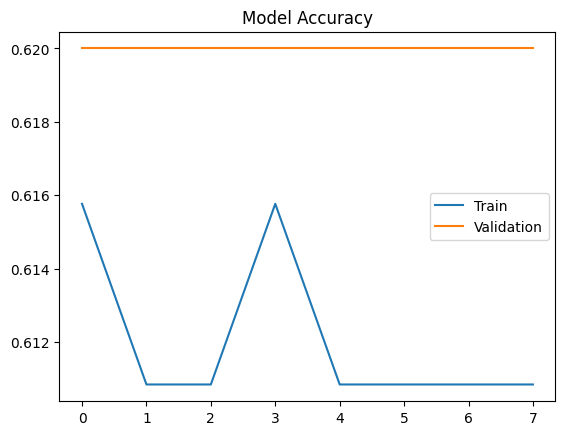

Upload an MRI image to test:


Saving brain mri.jpg to brain mri (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


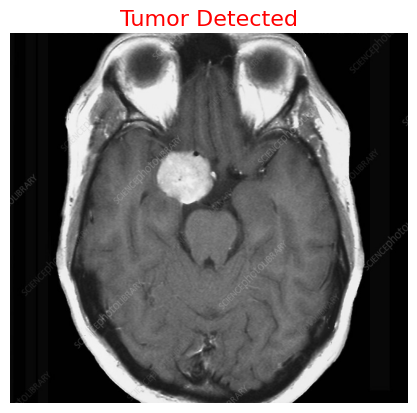

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
from google.colab import files

# =========================
# FIX DATASET STRUCTURE
# =========================

data_dir = "/content/brain_mri"

# Remove extra folder if exists
extra_folder = os.path.join(data_dir, "brain_tumor_dataset")
if os.path.exists(extra_folder):
    shutil.rmtree(extra_folder)

print("Dataset folders:", os.listdir(data_dir))

# =========================
# DATA GENERATOR
# =========================

img_size = 224
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train = datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val = datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

# =========================
# MODEL
# =========================

base_model = EfficientNetB0(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# =========================
# TRAIN
# =========================

history = model.fit(
    train,
    validation_data=val,
    epochs=8
)

# =========================
# PLOT ACCURACY
# =========================

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train','Validation'])
plt.title("Model Accuracy")
plt.show()

# =========================
# UPLOAD & PREDICT (SHOW IMAGE)
# =========================

print("Upload an MRI image to test:")
uploaded = files.upload()

for filename in uploaded.keys():
    img_path = filename

img = image.load_img(img_path, target_size=(224,224))
img_array = image.img_to_array(img)/255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)

result = "Tumor Detected" if prediction[0][0] > 0.5 else "No Tumor Detected"

# Display image with result
plt.imshow(image.load_img(img_path))
plt.title(result, fontsize=16, color='red')
plt.axis('off')
plt.show()


In [13]:
import gradio as gr
import numpy as np
import cv2

def predict_mri(image):
    image = cv2.resize(image, (128,128))
    image = image / 255.0
    image = image.reshape(1,128,128,3)

    prediction = model.predict(image)

    if prediction[0][0] > 0.5:
        return "Tumor Detected"
    else:
        return "No Tumor Detected"

interface = gr.Interface(
    fn=predict_mri,
    inputs=gr.Image(type="numpy"),
    outputs="text",
    title="Brain Tumor Detection Dashboard",
    description="Upload an MRI image to detect tumor"
)

interface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://32bcfedb4bce7eca82.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [14]:
pip install streamlit


In [ ]:
!npm install localtunnel
!streamlit run app.py &>/content/logs.txt &
!npx localtunnel --port 8501


⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙
added 22 packages in 2s
⠙
⠙3 packages are looking for funding
⠙  run `npm fund` for details
⠙⠙your url is: https://sharp-animals-stand.loca.lt


In [ ]:
!curl ipv4.icanhazip.com
